In [65]:
from __future__ import print_function, division
import pandas
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import numpy as np

First, load the data into a pandas dataframe. This is the most recent ESS round, round 7. 

ESS data is representative, not oversampled.

In [66]:
ess = pandas.read_stata('ESS7e02_1.dta',convert_categoricals=False, convert_missing=False)

Variables of interest:
http://nesstar.ess.nsd.uib.no/webview/


happy: How happy are you 

Apurva

    +2 extra

    health: subjective general health

    aesfdrk: Feeling of safety of walking alone in local area after dark

    almuslv: Allow many or few Muslims to come and live in country

    blgetmg: belong to minority ethnic group in that country

    imptrad: Important to follow traditions and customs

Celina

    +2 extra

    ipudrst: Important to understand different people

    impfun: Important to seek fun and things that give pleasure 

    smegbhw: Some races or ethnic groups: born harder working 

    smegbli: Some races or ethnic groups: born less intelligent 

    cntry: Country



In [67]:
def OurPlot(column_name, upper_bound, label):
    ess.loc[column_name > upper_bound] = np.nan
    hist = thinkstats2.Hist(column_name)
    thinkplot.Hist(hist)
    thinkplot.Show(xlabel='%s' %label, ylabel='Frequency')
    return hist

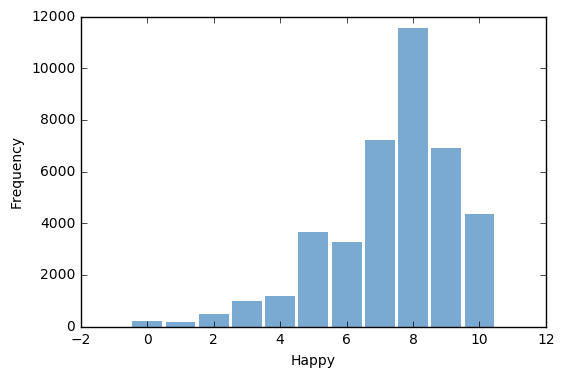

Hist({0.0: 220, 1.0: 171, 2.0: 470, 3.0: 981, 4.0: 1190, 5.0: 3645, 6.0: 3288, 7.0: 7235, 8.0: 11563, 9.0: 6915, 10.0: 4337})

In [68]:
OurPlot(ess.happy, 10, 'Happy')

In [69]:
# TODO: text, splitting into cells

In [70]:
#decided to use a dictionary for plotting
country_dict = {'AT':'Austria', 'BE':'Belgium', 'CH':'Switzerland', 'CZ':'Czech Republic', 'DE':'Germany', 'DK':'Denmark', 'EE':'Estonia', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'GB':'United Kingdom', 'HU':'Hungary', 'IE':'Ireland', 'IL':'Israel', 'LT':'Lithuania', 'NL':'Netherlands', 'NO':'Norway', 'PL':'Poland', 'PT':'Portgual', 'SE':'Sweden', 'SI':'Slovenia'}

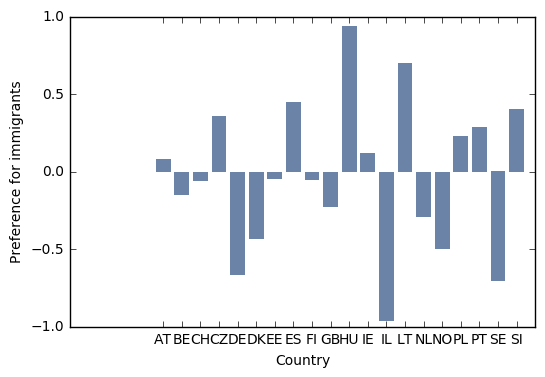

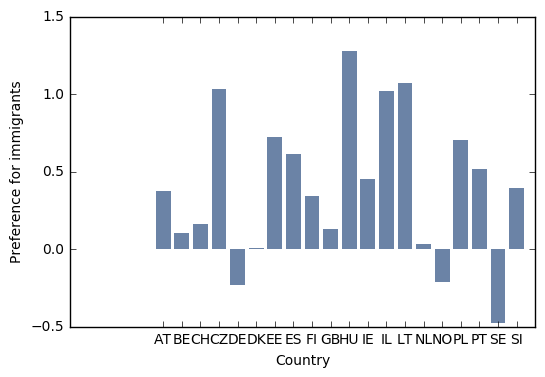

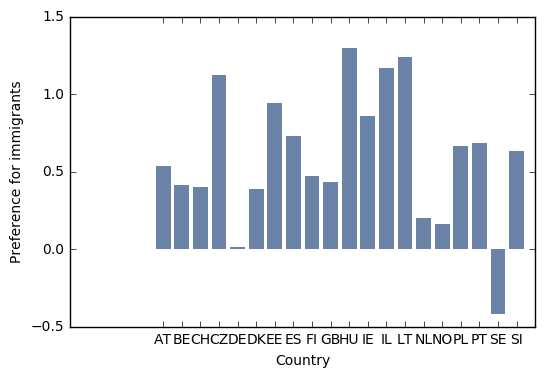

10
20


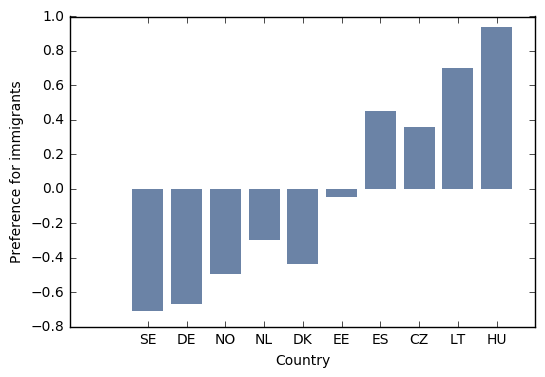

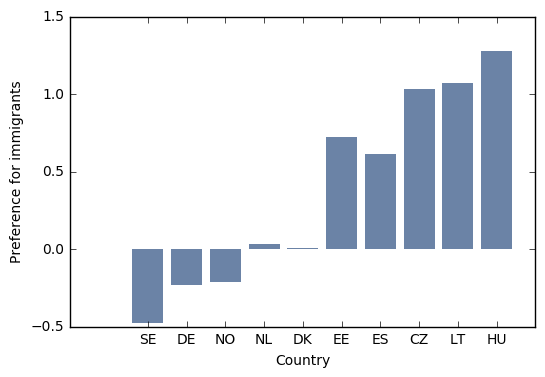

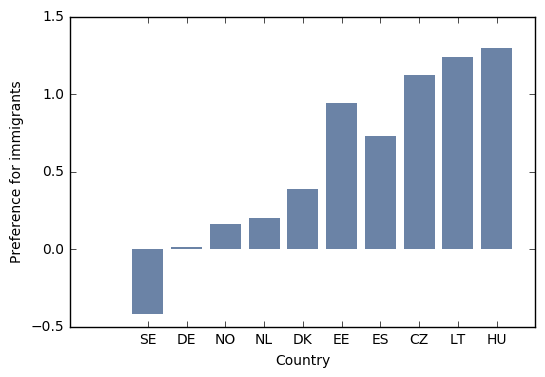

max overall:  HU
max Jewish:  HU
max Muslim:  HU
max Gypsy:  HU
min overall:  SE
min Jewish:  IL
min Muslim:  SE
min Gypsy:  SE


In [78]:
country_list = ['AT', 'BE', 'CH', 'CZ', 'DE', 'DK', 
                'EE', 'ES', 'FI', 'GB', 'HU', 'IE', 
                'IL', 'LT', 'NL', 'NO', 'PL', 'PT',
                'SE', 'SI']

# TODO: function-level comments

"""
Makes a bar graph with the country on the x axis. 
"""  
def PlotBar(mylist, country_list):
    #print (mean_list)
    #mean_dict = dict(zip(country_list, mean))
    #print (mean_dict)
    thinkplot.Bar(range(len(country_list)),mylist, align='center') # TODO: label plots
    plt.xticks(range(len(mylist)), country_list)
    thinkplot.Config(xlabel='Country', ylabel='Preference for immigrants')
    plt.show()
    #immjew_hist = CPlot(ess_country, ess_country.aljewlv, 4)
    #thinkplot.Show(xlabel = 'Allow Jewish People (many to none)', ylabel = 'Frequency')
    
    
# TODO: refactor as a loop    
aljewlv_mean_list = []
almuslv_mean_list = []    
algyplv_mean_list = []

for country in country_list:
    ess_country = ess[ess.cntry == country]
    aljewlv_mean_list.append(ess_country.aljewlv.mean()-2.5) # making 2.5 the neutral value
    almuslv_mean_list.append(ess_country.almuslv.mean()-2.5)
    algyplv_mean_list.append(ess_country.algyplv.mean()-2.5)
    
thinkplot.PrePlot(3)
PlotBar(aljewlv_mean_list, country_list) 
PlotBar(almuslv_mean_list, country_list)
PlotBar(algyplv_mean_list, country_list)


#which country is the most xenophobic in general?
total_allow =[sum(x)/3 for x in zip(aljewlv_mean_list, almuslv_mean_list, algyplv_mean_list)]

allow_dict = dict(zip(country_list, total_allow))

find_country = dict(zip(total_allow, country_list))

max_val = max(allow_dict, key=lambda key: allow_dict[key])
min_val = min(allow_dict, key=lambda key: allow_dict[key])

def MinMaxCountryFromList(mylist, maximum):
    if (maximum):
        return (country_list[mylist.index(max(mylist))]) # inefficient but easy enough
    else:
        return (country_list[mylist.index(min(mylist))]) 
    

array_list = np.array([country_list, aljewlv_mean_list, almuslv_mean_list, algyplv_mean_list, total_allow])
listdf = pandas.DataFrame(array_list)

# TODO: Find valuecounts (top and bottom 5) and plot

columns = ['Mean']
total_df = pandas.DataFrame(total_allow, columns=columns)
top_five_call = total_df['Mean'].value_counts().sort_index()
# print(top_five_call)
# top_five = top_five_call.iloc[0]
# print (top_five_call)

# print (total_allow)

min_max_list = []

sorted_means = sorted(total_allow)
for val in sorted_means[0:5]:
    min_max_list.append(find_country[val])
for val in sorted_means[len(sorted_means)-5:]:
    min_max_list.append(find_country[val])

print(len(min_max_list))
print(len(aljewlv_mean_list))

aljewlv_mean_short = []
almuslv_mean_short = []
algyplv_mean_short = []

for country in min_max_list:
    ess_country = ess[ess.cntry == country]
    aljewlv_mean_short.append(ess_country.aljewlv.mean()-2.5) # making 2.5 the neutral value
    almuslv_mean_short.append(ess_country.almuslv.mean()-2.5)
    algyplv_mean_short.append(ess_country.algyplv.mean()-2.5)


thinkplot.PrePlot(3)

PlotBar(aljewlv_mean_short, min_max_list) 
PlotBar(almuslv_mean_short, min_max_list)
PlotBar(algyplv_mean_short, min_max_list)

print ("max overall: ", max_val) #overall sentiment: people don't want Muslim, Jewish, and Gypsy immigrants
print ("max Jewish: ", MinMaxCountryFromList(aljewlv_mean_list, True))
print ("max Muslim: ", MinMaxCountryFromList(almuslv_mean_list, True))
print ("max Gypsy: ", MinMaxCountryFromList(algyplv_mean_list, True))

print ("min overall: ", min_val) #overall sentiment: people want Muslim, Jewish, and Gypsy immigrants
print ("min Jewish: ", MinMaxCountryFromList(aljewlv_mean_list, False))
print ("min Muslim: ", MinMaxCountryFromList(almuslv_mean_list, False))
print ("min Gypsy: ", MinMaxCountryFromList(algyplv_mean_list, False))



In [ ]:
def CPlot(df, column_name, upper_bound, label):
    df.loc[column_name > upper_bound] = np.nan
    hist = thinkstats2.Hist(column_name)
    thinkplot.Hist(hist)
    thinkplot.Show(xlabel='%s' %label, ylabel='Frequency')
    return hist

#immjew_hist = OurPlot(ess.aljewlv, 4, 'Allow Jewish People (many to none)')



country_list = ['AT', 'BE', 'CH', 'CZ', 'DE', 'DK', 
                'EE', 'ES', 'FI', 'GB', 'HU', 'IE', 
                'IL', 'LT', 'NL', 'NO', 'PL', 'PT',
                'SE', 'SI']

#ess_IL = ess[ess.cntry == 'IL']
#print (ess_AT)
#print (ess_AT.aljewlv)
#immjew_hist = CPlot(ess_IL, ess_IL.aljewlv, 4, 'Allow Jewish People (many to none- IL)')

for country in country_list:
    ess_country = ess[ess.cntry == country]
    immjew_hist = CPlot(ess_country, ess_country.aljewlv, 4, 'Allow Jewish People (many to none)')

In [ ]:
OurPlot(ess.health, 6, 'Health, good to bad')

In [ ]:
OurPlot(ess.aesfdrk, 4, 'Dark, safe to unsafe')

In [ ]:
print(ess.aljewlv.isnull().sum())
immjew_hist = OurPlot(ess.aljewlv, 4, 'Allow Jewish People (many to none)')


In [ ]:
immmus_hist = OurPlot(ess.almuslv, 4, "Allow Muslims (many to none)")

In [ ]:
immgyp_hist = OurPlot(ess.algyplv, 4, "Allow Gypsies (many to none)")

In [ ]:
OurPlot(ess.blgetmg, 2, "Belong to minority group")

In [ ]:
OurPlot(ess.imptrad, 6, "Importance of traditions (high to low)")

In [ ]:
OurPlot(ess.pplstrd, 5, "Better for a country if almost everyone shares customs and traditions (strongly agree to strongly disagree)")

In [ ]:
OurPlot(ess.ipudrst, 6, "Important to understand different people")

In [ ]:
OurPlot(ess.impfun, 6, "Important to seek fun and things that give pleasure")

In [ ]:
OurPlot(ess.smegbhw, 2, "Some races or ethnic groups: born harder working")

In [ ]:
OurPlot(ess.smegbli, 2, "Some races or ethnic groups: born less intelligent")

In [ ]:
immjew_pmf = thinkstats2.Pmf(immjew_hist, "Allowing Jews")
immmus_pmf = thinkstats2.Pmf(immmus_hist, "Allowing Muslims")
immgyp_pmf = thinkstats2.Pmf(immgyp_hist, "Allowing Gypsies")

thinkplot.PrePlot(3)
thinkplot.Pmfs([immjew_pmf, immmus_pmf, immgyp_pmf])
thinkplot.Config(xlabel='Many to none', ylabel='Frequency')
thinkplot.Show()

In [ ]:
immjew_cdf = thinkstats2.Cdf(ess.aljewlv, label = "Allowing Jews")
immmus_cdf = thinkstats2.Cdf(ess.almuslv, label = "Allowing Muslims")
immgyp_cdf = thinkstats2.Cdf(ess.algyplv, label =  "Allowing Gypsies")

mycdfs = [immjew_cdf, immmus_cdf, immgyp_cdf]
thinkplot.PrePlot(3)
thinkplot.Cdfs(mycdfs)
thinkplot.Config(xlabel='Many to none', ylabel='Cumulative Frequency')
thinkplot.Show()